## Principal Component Analysis (PCA)

Let $x \in \mathbb{R}^D$ be our original data vector and $z \in \mathbb{R}^L$ be the lower dimensional projection. We would like to minimize the reconstruction error $E$ as follows:

$\min_w E(w) = \min_w \frac{1}{N}\sum_{i=1}^{N}||x_i - \hat{x}_i||_2^2 = \min_w \frac{1}{N}\sum_{i=1}^{N}||x_i - W z_i||_2^2$

where $\hat{x}_i$ is a $D\times 1$ reconstructed vector lifted to the higher dimensional space, $z_i$ is the $L\times 1$ lower dimensional principal component vector and $W$ is a $D\times L$ orthornormal projection matrix.

Let $\hat{x}_i = Wz_i$ be our re-constructed vector. Since $W$ is orthonormal, we have $W^{T}W = WW^{T} = I$ and therefore, we can write our PCA projection as $z_i = W^{T}x_i$

We'll show that the optimal projection matrix $W$ is one that maximizes the variance of the projected data and is equal to a matrix of $L$ eigenvectors corresponding to the largest eigenvalues of the empirical covariance matrix (where we assume $x_i$ are zero mean): $\hat{\Sigma} = \frac{1}{N}\Sigma x_i x_i^{T}$

Let's start with the best 1-d solution, i.e. we want to find the optimum $w_1$ s.t. $z_{i1} = w_1^{T}x_i$ maximizes the variance of the projected data. Let's compute this variance:

$\mathrm{var}(z_1) = E[z_1^2] - E[z_1]^2 = \frac{1}{N}\sum_{i=1}^{N}z_{i1}^2 - 0$ since $E[z_{1}] = E[w_{1}^{T}x_i] = w_{1}^{T}E[x_i] = 0$ by our assumption of zero mean data $x_i$.

We want to maximize the variance: $\max_w \mathrm{var}(z_1) = \max_w \frac{1}{N}\sum_{i=1}^{N}z_{i1}^2 = \max_w \frac{1}{N}\sum_{i=1}^{N} w_1^T x_i x_i^{T}w_1 = \max_w w_1^{T} \hat{\Sigma} w_1$

Recall, that $W$ is orthornomal, in other words we have a constraint that $w_1^{T}w_1 = 1$. We can re-write our objective as a Langrangian $J(w)$ and find the optimum value that maximizes the variance of projected data by taking the derivative with respect to $w_1$.

$\max_w J(w) = \max_w w_1^{T} \hat{\Sigma} w_1 + \lambda_1 (1-w_1^{T}w_1)$

$\frac{\partial}{\partial w_1} J(w) = 2\hat{\Sigma} w_1 - 2\lambda_1 w_1 = 0 \rightarrow \hat{\Sigma} w_1 = \lambda_1 w_1$

Here, we see that $w_1$ that maximizes the variance is an eigenvector that corresponds to the eigenvalue of $\lambda_1$. If we multiply both sides by $w_1^{T}$ we get: $w_1^{T}\hat{\Sigma} w_1 = \lambda_1 w_1^{T} w_1 = \lambda_1$. In other words, the variance is equal to the eigenvalue and since we want to maximize the variance, we want to pick the largest eigenvalue $\lambda_1$.

We can repeat the above steps by subtracting the first principal component from $x_i$ and we'll discover that $\hat{\Sigma} w_2 = \lambda_2 w_2$ and so on. By induction, we can prove that the PCA matrix $W_{DL}$ consists of $L$ eigenvectors corresponding to the largest eigenvalues of the empirical covariance matrix $\hat{\Sigma}$.

Let's look at the python implementation!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
class PCA:
    
    def __init__(self, n_components = 2):
        self.n_components = n_components

    def covariance_matrix(self, X, Y=None):
        if Y is None:
            Y = X
        n_samples = np.shape(X)[0]
        covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))
        return covariance_matrix
    
    def transform(self, X):
        Sigma = self.covariance_matrix(X)
        eig_vals, eig_vecs = np.linalg.eig(Sigma)

        #sort from largest to smallest and select the first n_components
        idx = eig_vals.argsort()[::-1]
        eig_vals = eig_vals[idx][:self.n_components]
        eig_vecs = np.atleast_1d(eig_vecs[:,idx])[:, :self.n_components]

        #project the data onto principal components
        X_transformed = X.dot(eig_vecs)

        return X_transformed

[[ 0.6652193  -0.39738721]
 [ 0.29086667 -0.96423882]
 [ 0.96642091 -0.27901749]
 [ 0.288755   -0.47822392]
 [-0.18974632 -0.38687569]
 [-0.05630067 -0.26018019]
 [-0.48877692 -1.05397458]
 [-0.3667058  -0.46996136]
 [ 0.05165951 -0.67519595]
 [ 0.0485611  -0.34040269]
 [ 0.27703685 -0.76021925]
 [-0.37120887  0.0167855 ]
 [ 0.37175473 -0.42225826]
 [ 0.10853085 -0.64771393]
 [-0.53023344 -0.73497224]
 [ 0.00697119 -0.0012638 ]
 [ 0.02528358  0.04314469]
 [ 0.41710187 -0.81858187]
 [ 0.57790237 -0.87833235]
 [ 0.26837103  0.05332725]]


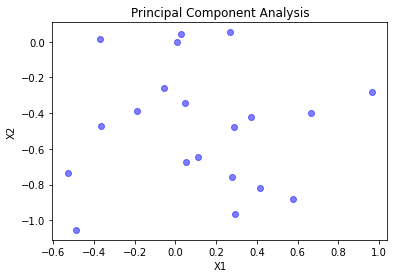

In [3]:
n = 20
d = 5
X = np.random.rand(n,d)

pca = PCA(n_components = 2)
X_pca = pca.transform(X)

print(X_pca)

plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], color='b', alpha=0.5)
plt.title("Principal Component Analysis"); plt.xlabel("X1"); plt.ylabel("X2")
plt.show()

In the figure above, we can see the PCA projection onto two components of a random matrix $X_{ND}$